## Gráficos y Correlaciones

- La prueba de hipótesis por lo general plantea en H0 igualdad estadistica en los valores. 

### Desafío 1: 


A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible rechazar la hipótesis nula.

- 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparentales. La organización encargada de procesar los datos obtuvo los siguientes resultados:
    - El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental.
    - Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
    - Con un valor de prueba  𝑝=11.83  y un puntaje de corte de 2.58, ¿qué se debe concluir?
- Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede decir sobre su estudio?

#### Respuestas:
* Considerando que el p-value es mayor que un alpha de 0,1-0,05-0,01 no existe evidencia suficiente para rechazar la Ho de que ambos porcentajes son distintos. A pesar de ser matematicamente diferentes estadisticamente no lo son.
* En el segundo caso no es posible afirmar o rechazar la hipótesis con los datos presentados en el enunciado.

### Desafío 2: 


- Agrege una serie de variables binarias por cada continente de la variable region .
    * tip: Utilice np.where para ello.
- De manera similar a la sesión anterior, enfóquese en las siguientes variables:
    * Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life.
    * Apellidos desde la N hasta la Z: Enfocarse en las variables femlab , literacy y school.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv("nations.csv", encoding="Latin_1")

In [3]:
# Agregamos country y region
df = df[['country', 'region','femlab','literacy', 'school']]
df

,country,region,femlab,literacy,school
0,Algeria,Africa,0.4522,72.599998,6.716667
1,Benin,Africa,0.8482,41.700001,3.100000
2,Botswana,Africa,0.8870,84.099998,8.600000
3,Burkina Faso,Africa,0.8584,23.600000,1.300000
4,Burundi,Africa,1.0344,66.599998,2.483333
...,...,...,...,...,...
189,Samoa,Oceania,0.5010,98.800003,10.300000
190,Solomon Islands,Oceania,0.4858,NaN,4.500000
191,Tonga,Oceania,0.7150,99.000000,10.133333
192,Tuvalu,Oceania,NaN,NaN,NaN


In [4]:
for i in df["region"].unique():
    print(i)
    df[i] = np.where(df["region"] == i, 1, 0)
df

Africa
Americas
Asia
Europe
Oceania


,country,region,femlab,literacy,school,Africa,Americas,Asia,Europe,Oceania
0,Algeria,Africa,0.4522,72.599998,6.716667,1,0,0,0,0
1,Benin,Africa,0.8482,41.700001,3.100000,1,0,0,0,0
2,Botswana,Africa,0.8870,84.099998,8.600000,1,0,0,0,0
3,Burkina Faso,Africa,0.8584,23.600000,1.300000,1,0,0,0,0
4,Burundi,Africa,1.0344,66.599998,2.483333,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
189,Samoa,Oceania,0.5010,98.800003,10.300000,0,0,0,0,1
190,Solomon Islands,Oceania,0.4858,NaN,4.500000,0,0,0,0,1
191,Tonga,Oceania,0.7150,99.000000,10.133333,0,0,0,0,1
192,Tuvalu,Oceania,NaN,NaN,NaN,0,0,0,0,1


### Desafío 3: 

- La función debe ingresar los siguientes argumentos:
    * df : La tabla de datos.
    * variable : La variable a analizar.
    * binarize : El indicador binario a utilizar.
- tips:
    * Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos
con dropna() .
    * Implemente ttest_ind de scipy.stats y guarde el valor t y pval .
    * Reporte las medias para cada grupo (0 y 1).
    * Reporte la diferencia de entre las medias.
    * Reporte los valores t y p

In [5]:
# rtado = stats.ttest_ind(df[df['Africa']== 1]['femlab'].dropna(), df[df['Africa'] == 0]['femlab'].dropna())

In [6]:
def ttest(df,var, binarize):
    serie_es = df[df[binarize] == 1][var].dropna()
    serie_no_es =df[df[binarize] == 0][var].dropna()
    rtado = stats.ttest_ind (serie_es, serie_no_es)
    print(f"El estadistico es {round(rtado[0],2)}\nEl p-value es {round(rtado[1],2)}")
    if rtado[1] < .05:
        print("Se rechaza H0 con un nivel de significancia de 0.05")
        print(f"Por lo que se concluye que el valor que asume la variable {var} en {i} es estadisticamente distinto a los valores que asume en el resto del mundo")
    return          

In [7]:
for i in df["region"].unique():
    print(i.upper())
    ttest(df, 'femlab', i)
    print("----------------\n")

AFRICA
El estadistico es 1.78
El p-value es 0.08
----------------

AMERICAS
El estadistico es -1.37
El p-value es 0.17
----------------

ASIA
El estadistico es -3.75
El p-value es 0.0
Se rechaza H0 con un nivel de significancia de 0.05
Por lo que se concluye que el valor que asume la variable femlab en Asia es estadisticamente distinto a los valores que asume en el resto del mundo
----------------

EUROPE
El estadistico es 3.06
El p-value es 0.0
Se rechaza H0 con un nivel de significancia de 0.05
Por lo que se concluye que el valor que asume la variable femlab en Europe es estadisticamente distinto a los valores que asume en el resto del mundo
----------------

OCEANIA
El estadistico es 0.53
El p-value es 0.59
----------------



### Desafío 4: 

- Genere una función que devuelva un gráfico donde visualice las dos histogramas cuando la
variable es 1 y 0, respectivamente.
- tips: Refactorize la función incluyendo el método hist de matplotlib.pyplot .
Incluya los argumentos alpha y label .
- Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por
cada continente, y posteriormente grafique. Concluya con los principales resultados al
respecto.

In [8]:
def plot_hist (df, var , binarize):
    es=df[df[binarize]== 1][var].dropna()
    no_es=df[df[binarize]== 0][var].dropna()
    plt.hist(es, alpha = .5, color = "purple", label =f"{binarize}")
    plt.hist(no_es,alpha = .5, color = "pink", label =f"Resto del Mundo")
    plt.legend()

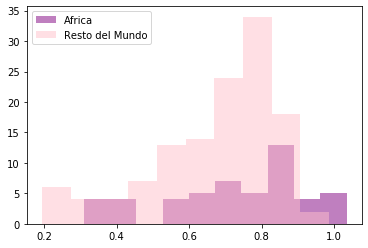

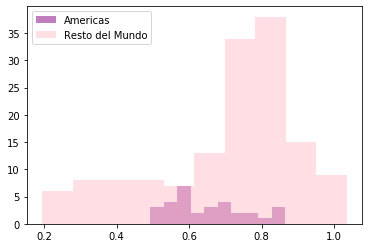

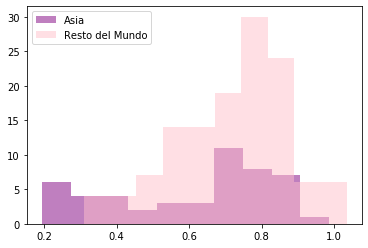

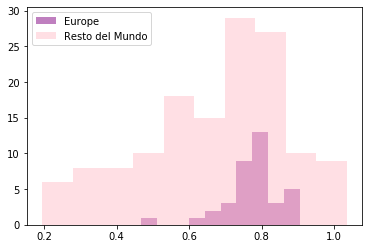

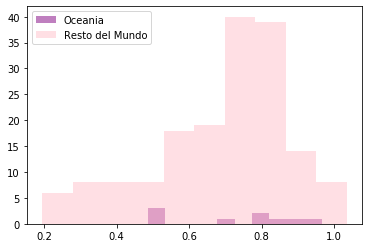

In [9]:
for i in df["region"].unique():
    plot_hist(df,'femlab', i)
    plt.show()

Para el caso del femlab es posible observar que en los casos en los que no rechazamos la H0 el comportamiento entre la region y el resto del mundo es semejante